<a href="https://colab.research.google.com/github/suyashmarathe512/suyash/blob/main/Image_Classification_(CIFAR_10_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Load the dataset

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [ ]:

y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

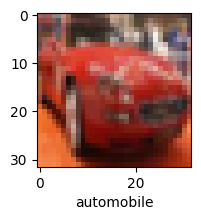

In [ ]:
plot_sample(X_train, y_train, 5)

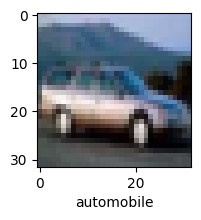

In [ ]:
plot_sample(X_train, y_train, 4)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

In [ ]:

X_train = X_train / 255.0
X_test = X_test / 255.0

Build simple artificial neural network for image classification

In [ ]:
import torch
import torch.nn as nn

class MyCNN(nn.Module):
    def __init__(self):
        super(MyCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(64 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 170498071/170498071 [00:03<00:00, 48156107.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = MyCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print statistics
        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch + 1, 10, i + 1, len(train_loader), loss.item()))

# Evaluate the model on the test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Test Accuracy: {}%'.format((correct / total) * 100))

Epoch [1/10], Step [100/782], Loss: 1.5456
Epoch [1/10], Step [200/782], Loss: 1.4163
Epoch [1/10], Step [300/782], Loss: 1.3426
Epoch [1/10], Step [400/782], Loss: 1.2950
Epoch [1/10], Step [500/782], Loss: 1.2632
Epoch [1/10], Step [600/782], Loss: 1.2574
Epoch [1/10], Step [700/782], Loss: 1.2600
Epoch [2/10], Step [100/782], Loss: 1.1914
Epoch [2/10], Step [200/782], Loss: 1.0678
Epoch [2/10], Step [300/782], Loss: 0.9215
Epoch [2/10], Step [400/782], Loss: 0.9573
Epoch [2/10], Step [500/782], Loss: 0.8523
Epoch [2/10], Step [600/782], Loss: 0.9244
Epoch [2/10], Step [700/782], Loss: 1.1253
Epoch [3/10], Step [100/782], Loss: 1.1028
Epoch [3/10], Step [200/782], Loss: 0.8977
Epoch [3/10], Step [300/782], Loss: 0.8097
Epoch [3/10], Step [400/782], Loss: 0.7482
Epoch [3/10], Step [500/782], Loss: 0.5685
Epoch [3/10], Step [600/782], Loss: 0.8851
Epoch [3/10], Step [700/782], Loss: 0.7220
Epoch [4/10], Step [100/782], Loss: 0.6686
Epoch [4/10], Step [200/782], Loss: 0.7147
Epoch [4/10